Привет, меня зовут Артем Хуршудов. Сегодня я проверю твой проект.
<br> Дальнейшее общение будет происходить на "ты" если это не вызывает никаких проблем.
<br> Желательно реагировать на каждый мой комментарий ('исправил', 'не понятно как исправить ошибку', ...)
<br> Пожалуйста, не удаляй комментарии ревьюера, так как они повышают качество повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:

<div class="alert alert-block alert-success">
<b>Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>

-------------------

Будет очень хорошо, если ты будешь помечать свои действия следующим образом:
<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> ...
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Были внесены следующие изменения ...
</div>

### <font color='orange'>Общее впечатление</font>
* Большое спасибо за проделанную работу. Видно, что приложено много усилий.
* Над этим проектом нужно будет еще немного поработать. Однако, изменения не должны занять много времени.
* В работе я оставил несколько советов. Буду рад, если ты учтешь их.
* С радостью отвечу на твои вопросы, если они есть. Лучше всего их собрать в следующей ячейке. Жду новую версию проекта.

<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> Прошу прощения, я случайно отправил недоделанный проект, хотел его только загрузить и доделать в jupyterhub.

### <font color='orange'>Общее впечатление (ревью 2)</font>
* Для удобства все новые комментарии обозначены фразой "ревью 2".
* Удачи в доработке!

### <font color='orange'>Общее впечатление (ревью 3)</font>
* Новые комментарии обозначены фразой "ревью 3". Есть еще одна критическая ошибка (ты ее пропустил во 2-ром ревью).

### <font color='orange'>Общее впечатление (ревью 4)</font>
* После исправлений проект улучшился и теперь он может быть зачтен.
* С выбором региона согласен.
* Удачи в дальнейшем обучении и следующих работах!

# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import os
import io
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.utils import shuffle
import warnings
warnings.simplefilter("ignore")

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score
from sklearn.dummy import DummyClassifier

<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично, что все импорты собраны в первой ячейке ноутбука! Если у того, кто будет запускать твой ноутбук будут отсутствовать некоторые библиотеки, то он это увидит сразу, а не в процессе!
</div>

In [2]:
try:
    geo0 = pd.read_csv('/datasets/geo_data_0.csv')
    geo1 = pd.read_csv('/datasets/geo_data_1.csv')
    geo2 = pd.read_csv('/datasets/geo_data_2.csv')
    
except:
    from google.colab import files
    uploaded = files.upload()
    geo0 = pd.read_csv(io.BytesIO(uploaded['geo_data_0.csv']))
    geo1 = pd.read_csv(io.BytesIO(uploaded['geo_data_1.csv']))
    geo2 = pd.read_csv(io.BytesIO(uploaded['geo_data_2.csv']))



In [3]:
for i in [geo0, geo1, geo2]:
    i.info()
    display(i.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [4]:
for i in [geo0, geo1, geo2]:
    display(i[i.duplicated()].count())

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [5]:
for i in [geo0, geo1, geo2]:
    print(i.isnull().sum().sort_values(ascending=False)/i.shape[0])

id         0.0
f0         0.0
f1         0.0
f2         0.0
product    0.0
dtype: float64
id         0.0
f0         0.0
f1         0.0
f2         0.0
product    0.0
dtype: float64
id         0.0
f0         0.0
f1         0.0
f2         0.0
product    0.0
dtype: float64


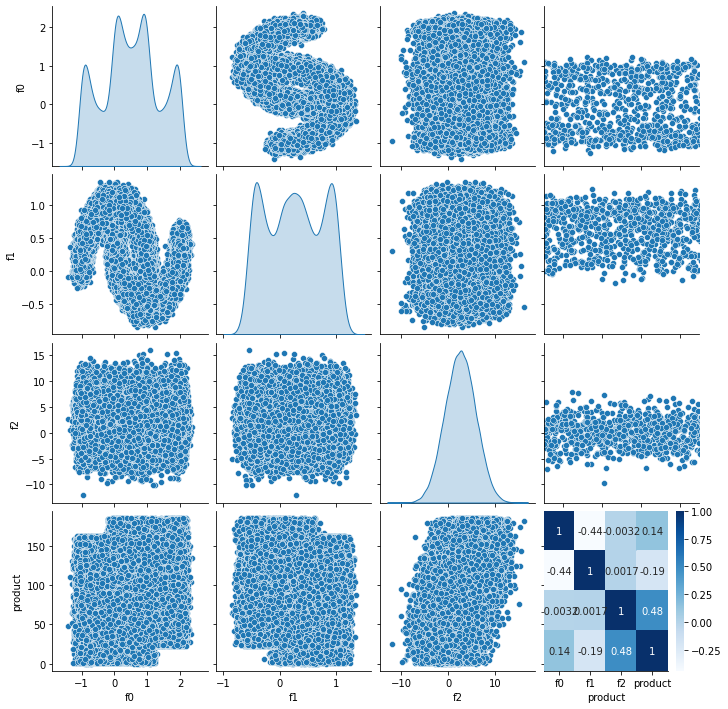

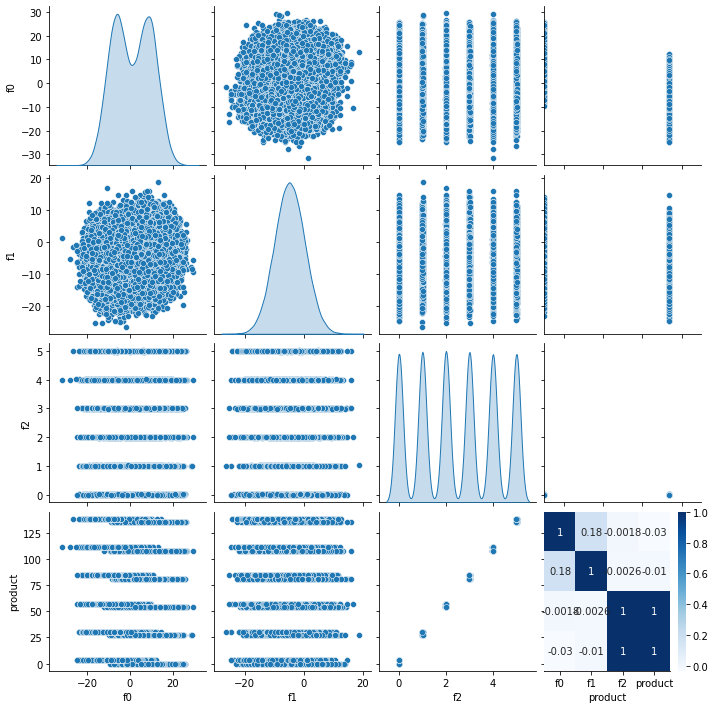

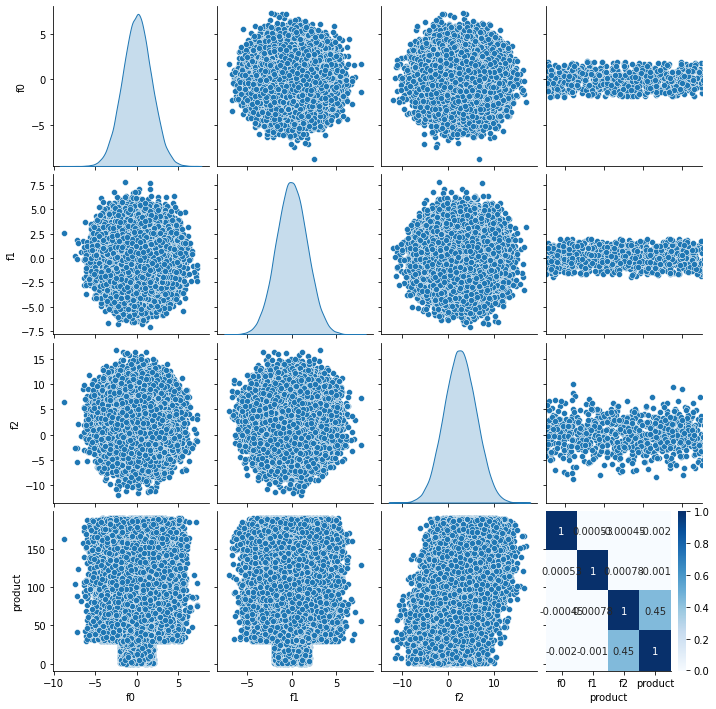

In [6]:
for i in [geo0, geo1, geo2]:
    sns.pairplot(data=i, diag_kind='kde')
    sns.heatmap(i.corr(), cmap='Blues', annot=True)
    plt.show()

<div class="alert alert-block alert-success">
<b>Успех:</b> Данные загружены и осмотрены корректно. Радует, что распределения были визуализированы!
</div>

## Обучение и проверка модели

In [7]:
def splitter(geo):
    rand_value = 12345
    features = geo.drop(['id','product'], axis = 1)
    target = geo['product']
    rand_value = 12345
    features_train, features_valid, target_train, target_valid = train_test_split(
        features, target, test_size=0.25, random_state=rand_value)
    #features_train =  preprocessing.normalize(features_train) - нормализация признаков в train 
    #не дала улучшения работы модели
    return (features_train, features_valid, target_train, target_valid )

In [8]:
features0_train, features0_valid, target0_train, target0_valid = splitter(geo0)
display(features0_train.shape)
display(features0_valid.shape)
display(target0_train.shape)
display(target0_valid.shape)

(75000, 3)

(25000, 3)

(75000,)

(25000,)

In [9]:
features1_train, features1_valid, target1_train, target1_valid  = splitter(geo1)
display(features1_train.shape)
display(features1_valid.shape)
display(target1_train.shape)
display(target1_valid.shape)

(75000, 3)

(25000, 3)

(75000,)

(25000,)

In [10]:
features2_train, features2_valid, target2_train, target2_valid  = splitter(geo2)
display(features2_train.shape)
display(features2_valid.shape)
display(target2_train.shape)
display(target2_valid.shape)

(75000, 3)

(25000, 3)

(75000,)

(25000,)

In [11]:
#Libnear REgression ??, n_jobs = 500
model0 = LinearRegression()
model0.fit(features0_train, target0_train)
predictions0_valid = model0.predict(features0_valid)
rmse = mean_squared_error(target0_valid, predictions0_valid, squared=False)
print(predictions0_valid)
print('Средний объем предсказанного сырья в скважинах в локации 0:', predictions0_valid.mean())
print('RMSE модели в локации 0:', rmse) 

[ 95.89495185  77.57258261  77.89263965 ...  61.50983303 118.18039721
 118.16939229]
Средний объем предсказанного сырья в скважинах в локации 0: 92.59256778438035
RMSE модели в локации 0: 37.5794217150813


In [12]:
#Libnear REgression ??, n_jobs = 500
model1 = LinearRegression( fit_intercept=True)
model1.fit(features1_train, target1_train)
predictions1_valid = model1.predict(features1_valid)
rmse = mean_squared_error(target1_valid, predictions1_valid, squared=False)
print(predictions1_valid)
print('Средний объем предсказанного сырья в скважинах в локации 1:', predictions1_valid.mean())
print('RMSE модели в локации 1:', rmse) 

[ 82.66331365  54.43178616  29.74875995 ... 137.87934053  83.76196568
  53.95846638]
Средний объем предсказанного сырья в скважинах в локации 1: 68.728546895446
RMSE модели в локации 1: 0.893099286775617


In [13]:
#Libnear REgression ??, n_jobs = 500
model2 = LinearRegression( fit_intercept=True)
model2.fit(features2_train, target2_train)
predictions2_valid = model2.predict(features2_valid)
rmse = mean_squared_error(target2_valid, predictions2_valid, squared=False)
print(predictions2_valid)
print('Средний объем предсказанного сырья в скважинах в локации 2:', predictions0_valid.mean())
print('RMSE модели в локации 2:', rmse) 

[ 93.59963303  75.10515854  90.06680936 ...  99.40728116  77.77991248
 129.03241718]
Средний объем предсказанного сырья в скважинах в локации 2: 92.59256778438035
RMSE модели в локации 2: 40.02970873393434


ошибка модели очень высока в локации 0 и локации 2, в локации 1 она почему-то сильно меньше

<div class="alert alert-block alert-info">
<b>Совет: </b> Перед обучением линейных моделей желательно нормализовать признаки, при этом scaler должен быть обучен только на треине.
</div>

<div class="alert alert-block alert-success">
<b>Успех:</b> Модели обучены корректно.
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> На протяжении всего проекта происходит работа с 3мя одинаковыми таблицами. В связи с этим можно было использовать функции и/или циклы, чтобы избежать копирования кода.
<br> Зачем его нужно избегать? Потому что очень часто оно приводит к ошибкам (например, забыл поменять одну из переменных). Впоследствии такие ошибки очень трудно найти.
</div>

<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> попробовал нормализовать признаки в train так:
    
    *features_train =  preprocessing.normalize(features_train)
    *получил отрицательный результат в rmse при обучении модели
    
<b>*функции и циклы включаю где интуитивно понятно, спасибо

<div class="alert alert-block alert-info">
<b>Совет (ревью 2): </b> Лучше было использовать StandartScaler. Обучить его на треине и применить к треину и к тесту.
</div>

## Подготовка к расчёту прибыли

In [14]:
BUDGET = 10**10
PRICE = 450 * 10**3
WELLS2DRILL = 200
print(BUDGET, PRICE, WELLS2DRILL)

10000000000 450000 200


In [15]:
BUDGET4WELLS = BUDGET / WELLS2DRILL
PRODUCT4WELL = BUDGET4WELLS / PRICE
print(BUDGET4WELLS, PRODUCT4WELL)
#для безубыточной добычи необходимо с каждой из 200 скважин добывать 111,(1) тыс баррелей

50000000.0 111.11111111111111


In [16]:
for i in [geo0, geo1, geo2]:
    print(i['product'].mean())

#в среднем, все регионы убыточные

92.50000000000001
68.82500000000002
95.00000000000004


<div class="alert alert-block alert-info">

<b>Совет: </b> В названиях константных переменных лучше использовать только БОЛЬШИЕ буквы. Это соглашение между программистами: https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html#id29 .
</div>

<div class="alert alert-block alert-success">
<b>Успех:</b> Точка безубыточности найдена верно, сравнение проведено!
</div>

<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> спасибо, поменял регистр

<div class="alert alert-block alert-success">
<b>Успех (ревью 2):</b> Спасибо!
</div>

## Расчёт прибыли и рисков 

In [17]:
#function for revenue for selected 500 wells
def revenue(target_subsample,target_valid):
    subsample_sorted = target_subsample.sort_values(ascending=False)
    subsample_selected = target_valid[subsample_sorted.index][:200]
    return subsample_selected.sum() * PRICE - 10**10

<div class="alert alert-block alert-danger">
<b>Ошибка (ревью 2):</b> Почему тут всегда используется target0_valid? Для каждого региона должен использоваться свой массив.
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка (ревью 3):</b> Ошибка выше не исправлена.
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Для выбора 200 лучших скважин нужно использовать предсказанные значения. А вот для подсчета прибыли должны использоваться настоящие значения соответствующих ячеек.
</div>

<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> спасибо, сделал подсчет реальной прибыли по валидационным значениям.
    
<br>я правильно понимаю, что мы берем модель, которая предсказывает добычу, даже если она предсказывает плохо и с большой ошибкой, для нас это не так важно, потому что бы по итогу для оценки прибыли используем реальные значения?
<br>

<div class="alert alert-block alert-success">
<b>Успех (ревью 2):</b> Ну у нас нет возможности взять другую модель, так что, скорее, это из-за отсутствия выбора.
</div>

<div class="alert alert-block alert-warning">
<b>Комментарий студента (ревью 3):</b> Спасибо! переписал, получился совсем другой результат, вывод тоже переписал

In [18]:

state = np.random.RandomState(12345)
values_q = []
values = []
for i in range(1000):
    target_subsample = pd.Series(predictions0_valid, index = target0_valid.index).sample(n = 500, replace=True, random_state=state)
    values.append(pd.Series(revenue(target_subsample, target0_valid)).quantile(0.95))
values = pd.Series(values)
lower = values.quantile(0.025)
upper = values.quantile(0.975)
mean = values.mean()
print(values)
print("Средняя выручка локации 0:", mean)
print("2,5%-квантиль локации 0:", lower)
print("97,5%-квантиль локации 0:", upper)
print('Риск убытков составит', values[values <0].count() / 10, '%')

0      6.054641e+08
1      5.363934e+08
2      2.937858e+08
3      1.789934e+08
4      2.719929e+08
           ...     
995    5.253551e+08
996    7.790094e+08
997    6.494122e+08
998    3.149995e+08
999    2.197184e+08
Length: 1000, dtype: float64
Средняя выручка локации 0: 396164984.8023711
2,5%-квантиль локации 0: -111215545.89049526
97,5%-квантиль локации 0: 909766941.5534226
Риск убытков составит 6.9 %


<div class="alert alert-block alert-info">
<b>Совет (ревью 2): </b> А зачем брать 95-ый квантиль у массива с 1 элементом?
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Для подсчета доверительного интервала стоит использовать метод квантилей, так как мы реализуем технику бутстрап. У тебя посчитан только нижний квантиль.
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Нужно еще найти риск убытков – долю случаев, в которых прибыль отрицательна.
</div>

<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> посчитал второй квантиль, количество отрицательных исходов и дописал вывод.
    
<br>

<div class="alert alert-block alert-success">
<b>Успех (ревью 2):</b> Отлично, молодец!
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка (ревью 2):</b> Риск – это доля, а не количество. Нужно его найти для всех регионов ниже.
</div>

<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> переписал про риск ошибок, сделал для всех локаций
    
<br>

<div class="alert alert-block alert-success">
<b>Успех (ревью 2):</b> Верно.
</div>

In [20]:
state = np.random.RandomState(12345)  
values = []
for i in range(1000):
    target_subsample = pd.Series(predictions1_valid, index = target1_valid.index).sample(n = 500, replace=True, random_state=state)
    values.append(pd.Series(revenue(target_subsample, target1_valid)).quantile(0.95))
values = pd.Series(values)
lower = values.quantile(0.025)
upper = values.quantile(0.975)
mean = values.mean()
print(values.head())
print("Средняя выручка локации 1:", mean)
print("2.5%-квантиль локации 1:", lower)
print("97,5%-квантиль локации 1:", upper)
print('Риск убытков составит', values[values <0].count() / 10, '%')

0    2.280162e+08
1    3.343157e+08
2    2.537047e+08
3    6.139661e+08
4    3.571430e+08
dtype: float64
Средняя выручка локации 1: 456045105.7866608
2.5%-квантиль локации 1: 33820509.39898363
97,5%-квантиль локации 1: 852289453.866036
Риск убытков составит 1.5 %


In [19]:
state = np.random.RandomState(12345)
values = []
for i in range(1000):
    target_subsample = pd.Series(predictions2_valid, index = target2_valid.index).sample(n = 500, replace=True, random_state=state)
    values.append(pd.Series(revenue(target_subsample, target2_valid)).quantile(0.95))
values = pd.Series(values)
lower = values.quantile(0.025)
upper = values.quantile(0.975)
mean = values.mean()
print(values.head())
print("Средняя выручка локации 2:", mean)
print("5%-квантиль локации 2:", lower)
print("97,5%-квантиль локации 2:", upper)
print('Риск убытков составит', values[values <0].count() / 10, '%')

0   -7.189923e+07
1    6.459964e+08
2    6.261756e+08
3    4.123517e+08
4   -5.596049e+07
dtype: float64
Средняя выручка локации 2: 404403866.5683568
5%-квантиль локации 2: -163350413.39560106
97,5%-квантиль локации 2: 950359574.9237995
Риск убытков составит 7.6 %


<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Не забывай про вывод в конце проекта.
</div>

<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> в локациях 0 и 2 мы с вероятностью выше  получим убыток.
    
<br>для разработки предлагается локация 1. 
<br>даже при учете низкой точности модели, в целом, локация 1 будет прибыльной.
<br>Вероятность убытков там составит 1,5%.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: модели обучены и проверены
    - [x]  Данные корректно разбиты на обучающую и валидационную выборки
    - [x]  Модели обучены, предсказания сделаны
    - [x]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [x]  На экране напечатаны результаты
    - [x]  Сделаны выводы
- [x]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [x]  Для всех ключевых значений созданы константы Python
    - [x]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [x]  По предыдущему пункту сделаны выводы
    - [x]  Написана функция расчёта прибыли
- [x]  Выполнен шаг 4: посчитаны риски и прибыль
    - [x]  Проведена процедура *Bootstrap*
    - [x]  Все параметры бутстрепа соответствуют условию
    - [x]  Найдены все нужные величины
    - [x]  Предложен регион для разработки месторождения
    - [x]  Выбор региона обоснован